# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/20125029/shopeep_koreantop_clothing_shop_data.csv", encoding = "ISO-8859-1")
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

# 2. Vẽ biểu đồ so sánh số lượng shop gia nhập theo các năm

In [4]:
# Lấy dataframe chỉ chứa "join_year" và "shopid"
df2 = df.loc[:, ["join_year", "shopid"]]
df2

,join_year,shopid
0,2020,254711738
1,2020,314198143
2,2016,10377223
3,2017,21407329
4,2016,11187885
...,...,...
741,2021,449182992
742,2021,396605392
743,2020,360379308
744,2017,29392066


In [5]:
df2_s = df2.groupby(df2.join_year).count()
df2_s

,shopid
join_year,
2015,4
2016,27
2017,156
2018,87
2019,106
2020,247
2021,119


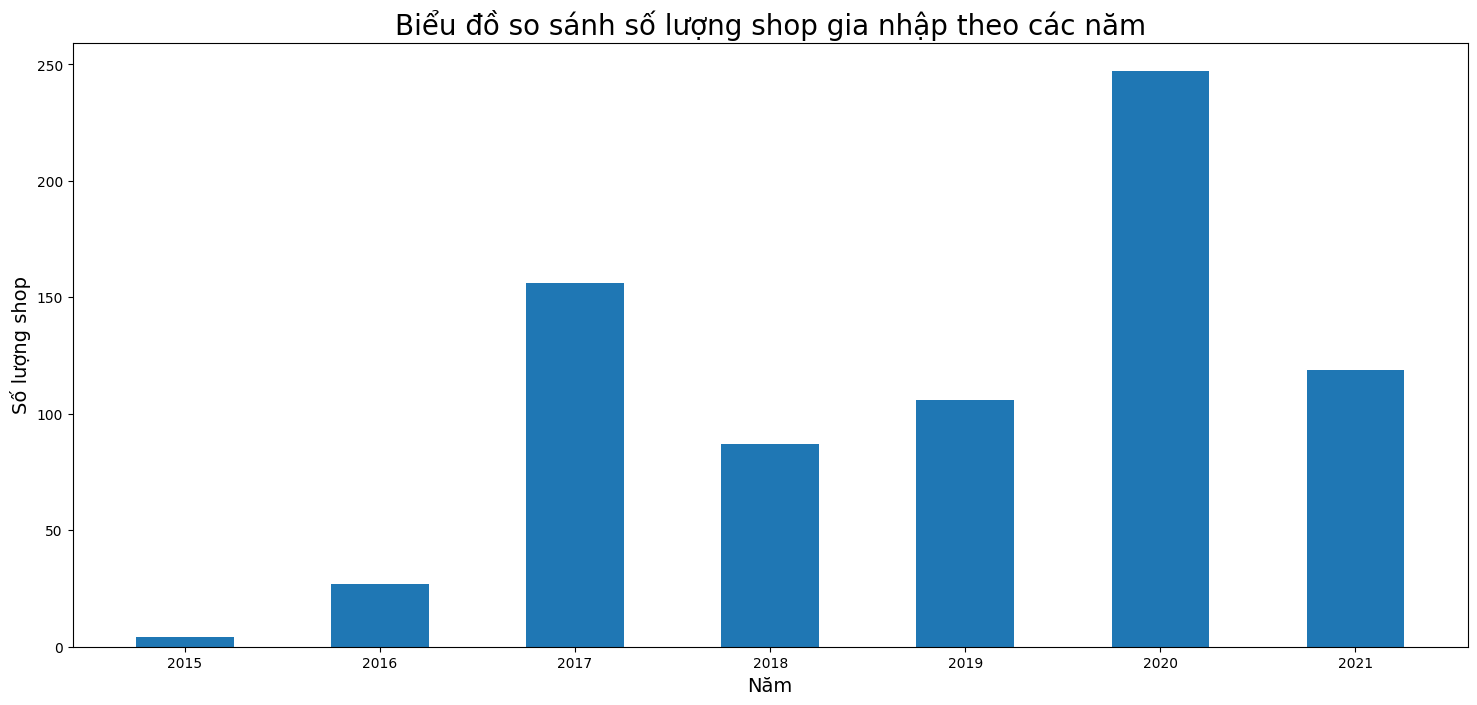

In [6]:
# Vẽ biểu cột so sánh số lượng shop gia nhập theo các năm
plt.figure(figsize = (18, 8), dpi = 100)
plt.bar(df2_s.index.get_level_values(0), df2_s.shopid, width = 0.5)
plt.title("Biểu đồ so sánh số lượng shop gia nhập theo các năm", fontsize = 20)
plt.xlabel("Năm", fontsize = 14)
plt.ylabel("Số lượng shop", fontsize = 14)
plt.show()

# 3. Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt

In [7]:
# Lấy ra dataframe chỉ chứa "response_rate" và "rating_good"
df3 = df.loc[:, ["response_rate", "rating_good"]]
df3

,response_rate,rating_good
0,96,17510
1,73,2656
2,90,1071829
3,94,18959
4,89,39252
...,...,...
741,86,32
742,91,9
743,96,463
744,73,103289


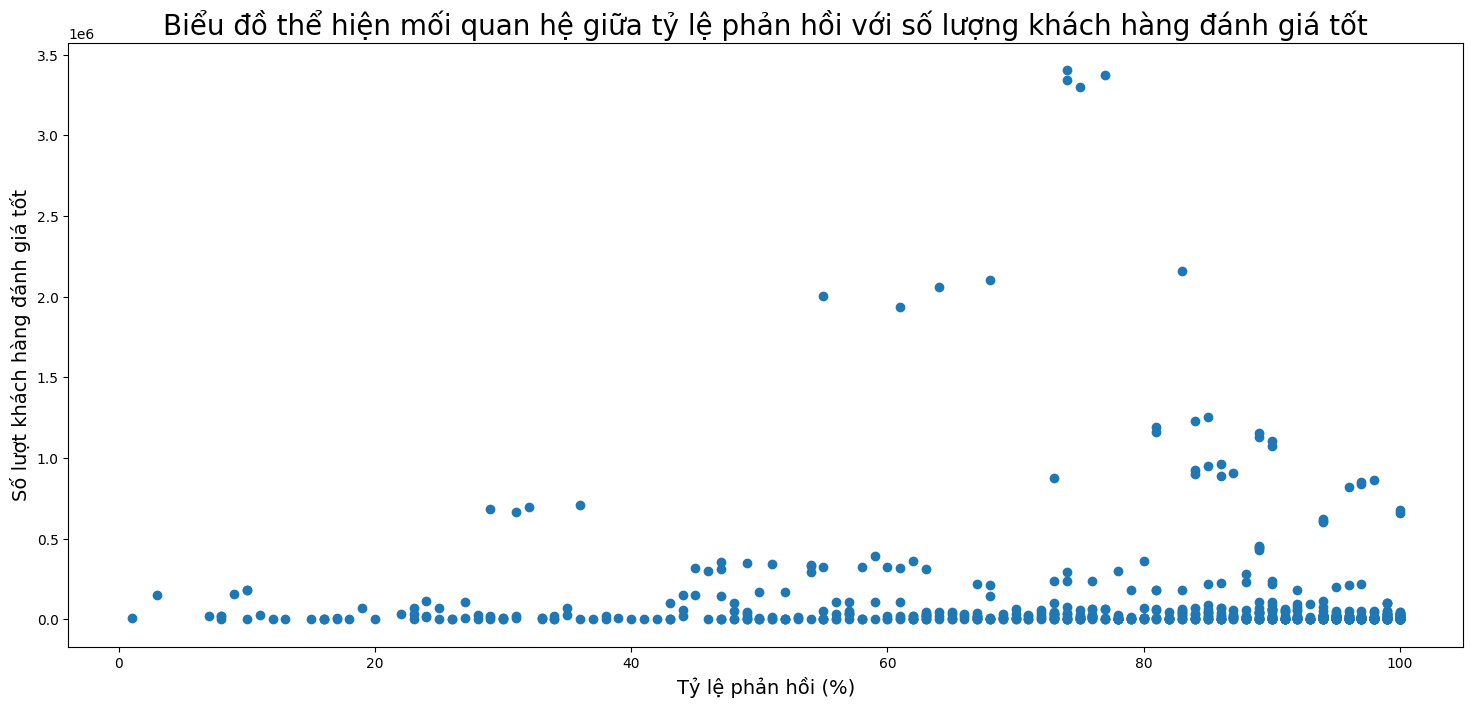

In [8]:
# Biểu đồ Scatter thể hiện mối quan hệ giữa tỷ lệ phản hồi với số lượng khách hành đánh giá tốt
plt.figure(figsize = (18,8), dpi = 100)
plt.scatter(df3.response_rate, df3.rating_good)
plt.title("Biểu đồ thể hiện mối quan hệ giữa tỷ lệ phản hồi với số lượng khách hàng đánh giá tốt", fontsize = 20)
plt.xlabel("Tỷ lệ phản hồi (%)", fontsize = 14)
plt.ylabel("Số lượt khách hàng đánh giá tốt", fontsize = 14)
plt.show()

# 4. Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu

In [9]:
# Lấy ra dataframe chỉ chứa "response_time" và "rating_bad"
df4 = df.loc[:, ["response_time", "rating_bad"]]
df4

,response_time,rating_bad
0,10:13:55,181
1,10:43:05,78
2,08:32:07,4647
3,09:10:38,44
4,11:40:59,680
...,...,...
741,08:45:30,0
742,08:01:23,1
743,08:46:30,16
744,12:19:44,1960


In [10]:
df4.response_time = pd.to_datetime(df4.response_time, format=' %H:%M:%S')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   response_time  746 non-null    datetime64[ns]
 1   rating_bad     746 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.8 KB


In [11]:
df4.head()

,response_time,rating_bad
0,1900-01-01 10:13:55,181
1,1900-01-01 10:43:05,78
2,1900-01-01 08:32:07,4647
3,1900-01-01 09:10:38,44
4,1900-01-01 11:40:59,680


In [12]:
df4["total_seconds"] = df4.response_time.dt.second + df4.response_time.dt.minute * 60 + df4.response_time.dt.hour * 3600
df4.head()

,response_time,rating_bad,total_seconds
0,1900-01-01 10:13:55,181,36835
1,1900-01-01 10:43:05,78,38585
2,1900-01-01 08:32:07,4647,30727
3,1900-01-01 09:10:38,44,33038
4,1900-01-01 11:40:59,680,42059


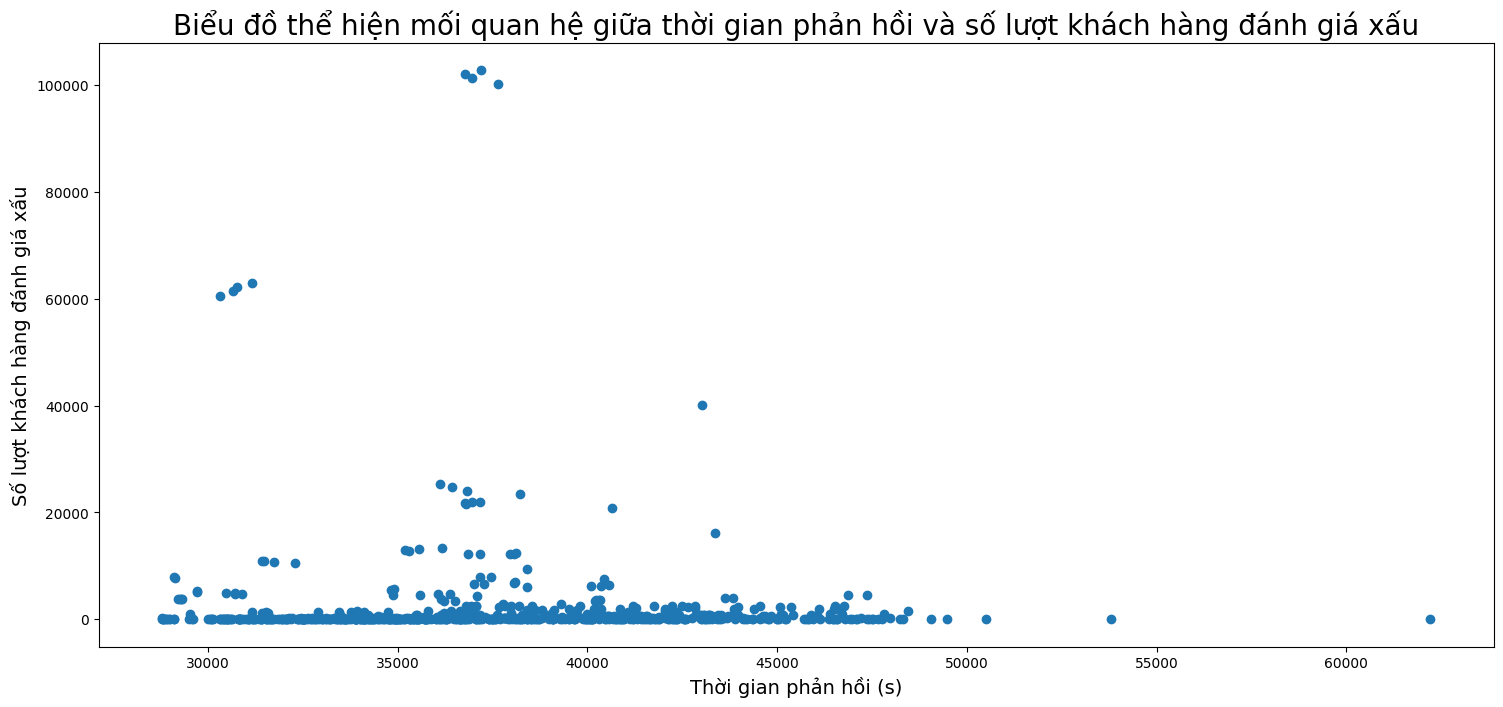

In [13]:
# Vẽ biểu đồ scatter thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) và số lượt khách hàng đánh giá xấu
# Biểu đồ Scatter thể hiện mối quan hệ giữa tỷ lệ phản hồi với số lượng khách hành đánh giá tốt
plt.figure(figsize = (18,8), dpi = 100)
plt.scatter(df4.total_seconds, df4.rating_bad)
plt.title("Biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi và số lượt khách hàng đánh giá xấu", fontsize = 20)
plt.xlabel("Thời gian phản hồi (s)", fontsize = 14)
plt.ylabel("Số lượt khách hàng đánh giá xấu", fontsize = 14)
plt.show()

# 5. Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian

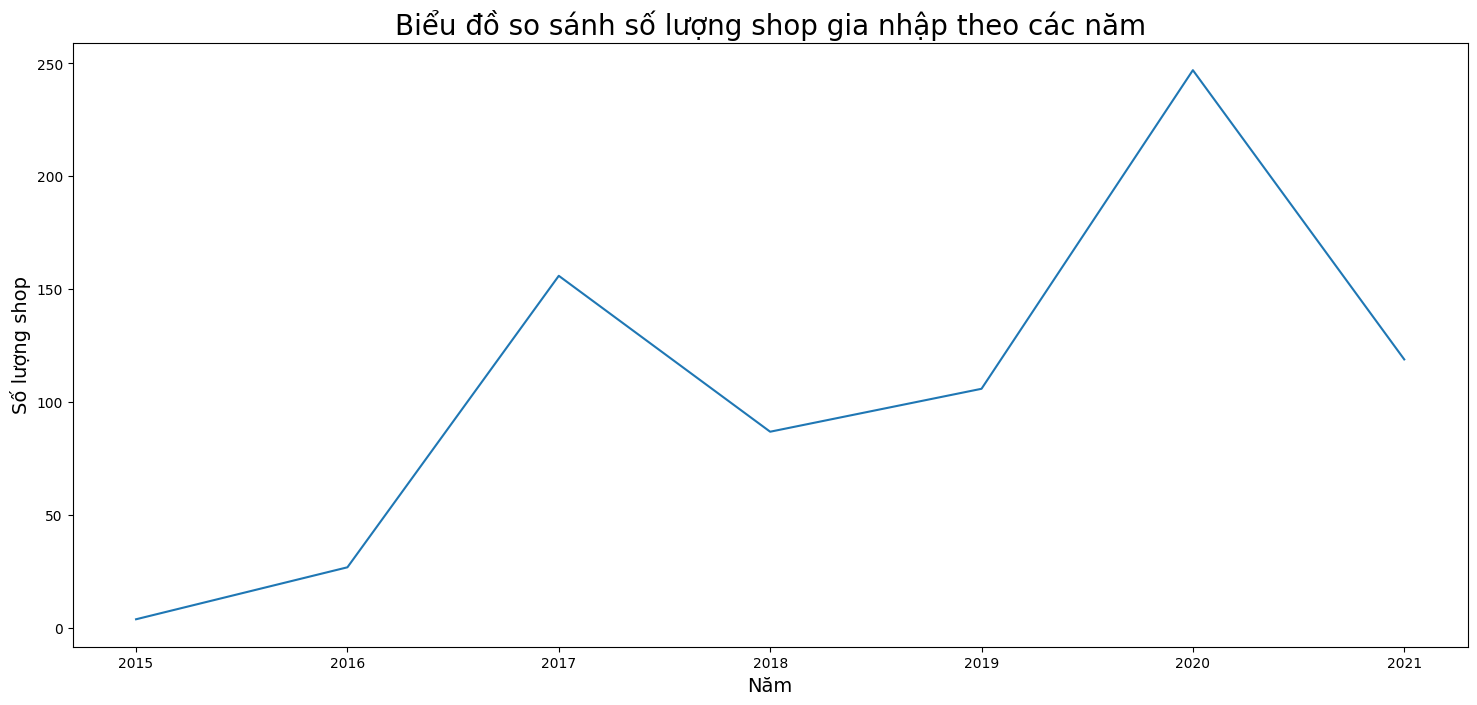

In [14]:
# Vẽ biểu đồ thể hiện xu hướng của số lượng shop gia nhập theo thời gian
plt.figure(figsize = (18, 8), dpi = 100)
plt.plot(df2_s.index.get_level_values(0), df2_s.shopid)
plt.title("Biểu đồ so sánh số lượng shop gia nhập theo các năm", fontsize = 20)
plt.xlabel("Năm", fontsize = 14)
plt.ylabel("Số lượng shop", fontsize = 14)
plt.show()

# 6. Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình

In [ ]:
plt.hist(df.rating_normal, bins)